<a href="https://colab.research.google.com/github/sunnyuants/DS_BharatIntern_june23/blob/main/Task_1_Google_Stock_Price_Prediction_Using_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Sunny Kumar**

**Task: Data Science Intern at BharatIntern**

**Company: #BharatIntern**

**Batch:June2023**

**Project Task-1: Google Stock Price Prediction in Python using LSTM**



**Importing libraries**

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Google Stock Price Train Dataset**

In [5]:
gstock = pd.read_csv(r"/content/Google_Stock_Price_Train.csv")
gstock.head(5)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
gstock_data = gstock[['Date', 'Open']]
gstock_data['Date'] = pd.to_datetime(gstock['Date'].apply(lambda x:x.split()[0]))
gstock_data.set_index('Date', drop = True, inplace = True)
gstock_data.head()

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


**Plotting the graph**

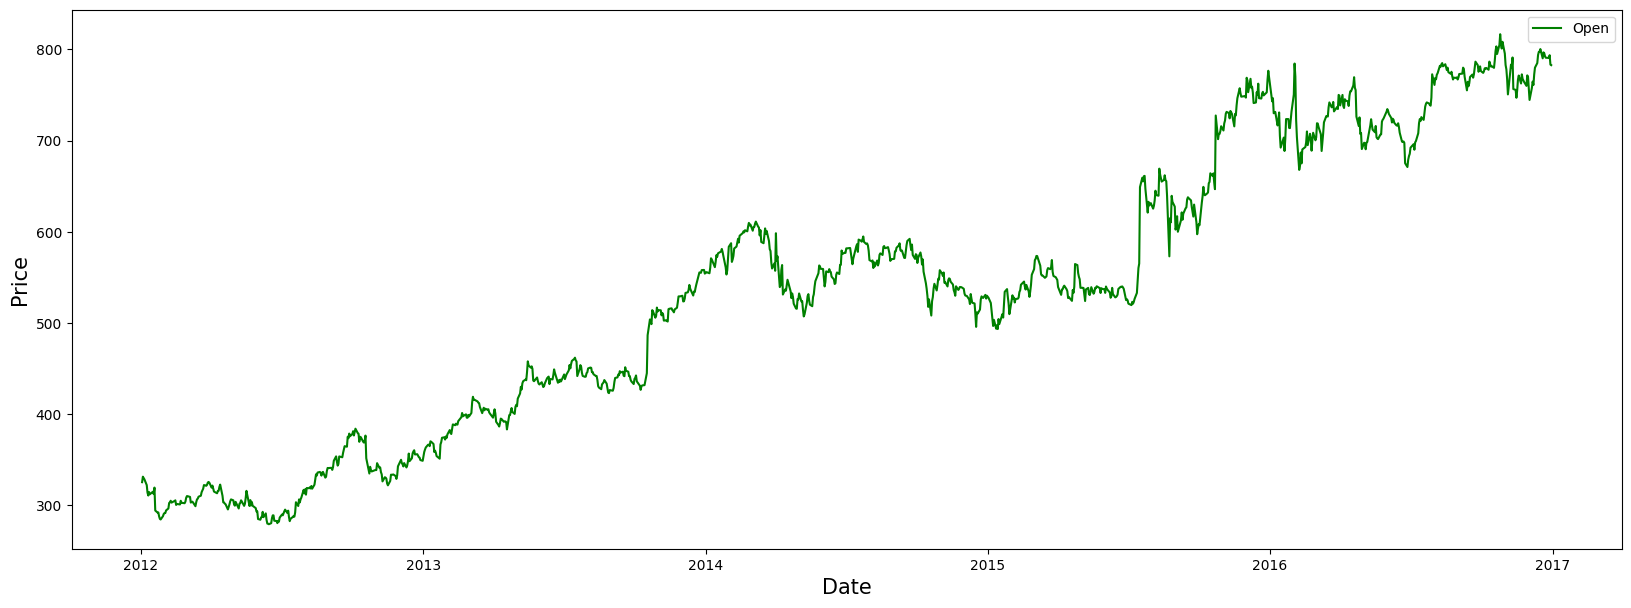

In [7]:
plt.figure(figsize =(20,7))
plt.plot(gstock_data['Open'], label='Open',color='green')
plt.xlabel('Date',size=15)
plt.ylabel('Price',size=15)
plt.legend()

plt.show()

**Data Pre-processing**

In [8]:
gstock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [9]:
gstock_data.shape

(1258, 1)

**Normalizing the Data**

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(gstock_data)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

**CREATING X_TRAIN AND Y_TRAIN DATA STRUCTURES**

In [11]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train.shape, y_train.shape

((1198, 60), (1198,))

**Reshaping the data**

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

**Lets build the RNN model using LSTM and other Layers**

In [13]:
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

**Fitting the model on X_train and y_train**

In [14]:
model.fit(X_train,y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 16s 162ms/step - loss: 0.0390
Epoch 2/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0050
Epoch 7/100
38/38 [==============================] - 5s 145ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0042
Epoch 13/100

**Extracting the actual Stock prices of Jan -2017**

In [15]:
test_data = pd.read_csv("/content/Google_Stock_Price_Test.csv")
actual_stock_price = test_data.iloc[:,1:2].values
actual_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

**Preparing the input for the Model**

In [16]:
dataset_total = pd.concat((gstock_data["Open"],test_data["Open"]), axis= 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Predicting the values for Jan 2017 Stock Prices**

In [17]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)
predicted_stock_prices

1/1 [==============================] - 2s 2s/step


array([[799.01514],
       [796.1268 ],
       [796.28796],
       [797.6758 ],
       [801.02313],
       [806.74023],
       [811.80206],
       [813.62823],
       [813.6692 ],
       [813.33826],
       [813.3415 ],
       [813.5717 ],
       [813.8868 ],
       [814.724  ],
       [815.7563 ],
       [820.28046],
       [826.9804 ],
       [834.1247 ],
       [837.74976],
       [833.2614 ]], dtype=float32)

**Plotting the Actual vs Predicted Open Prices for Google Stocks**

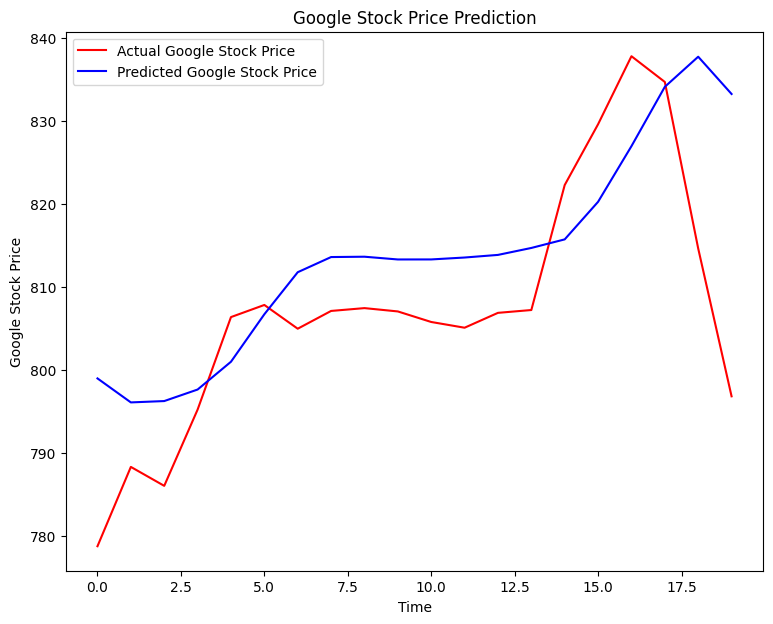

In [18]:
plt.figure(figsize = (9,7))
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_prices, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()

**Conclusion**

The Conclusion is the model can predict the trend of the actual stock prices very closely.

 The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.